In [1]:
from OTphase import FlattenPhaseExtractor
import matplotlib.pyplot as plt
import numpy as np

# Generate input / output example

In [2]:
def make_2d_gauss(x, y, means, s):
    m_x, m_y = means
    data = np.exp(-((x - m_x)**2 + (y - m_y)**2)/(s**2))
    return data

In [3]:
n = 8  # nb bins

# bin positions
xs, ys = np.meshgrid(
    np.arange(-n//2, n//2, dtype='float64'), 
    np.arange(-n//2, n//2, dtype='float64')
)

# Gaussian distributions
a = make_2d_gauss(xs, ys, (0, 0), n//6)
b = make_2d_gauss(xs, ys, (0, n//4), n//6) + make_2d_gauss(xs, ys, (0, -n//4), n//6)

In [5]:
model = FlattenPhaseExtractor(method='sinkhorn', reg=0.01, plot_plan=False) # method is either 'emd' or 'sinkhorn'
Fx, Fy, phase, curl = model(a, b)

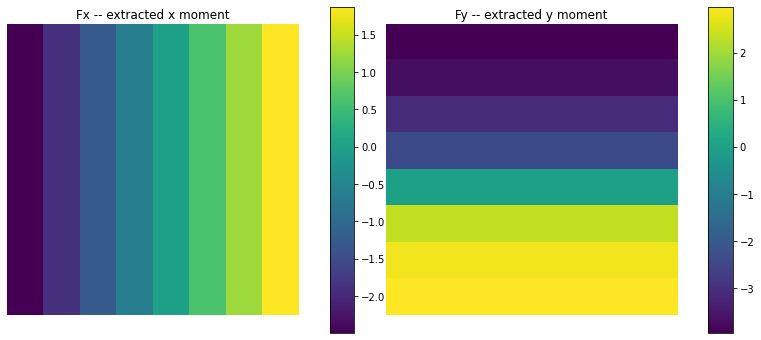

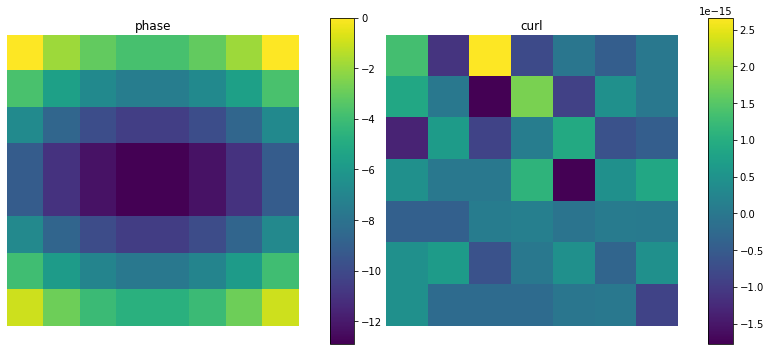

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(13, 6), gridspec_kw={'width_ratios': [6, 0.5, 6, 0.5]})
im1 = ax[0].imshow(Fx)
im2 = ax[2].imshow(Fy)
ax[0].axis('off')
ax[2].axis('off')
ax[0].set_title('Fx -- extracted x moment')
ax[2].set_title('Fy -- extracted y moment')
plt.colorbar(im1, ax[1])
plt.colorbar(im2, ax[3])
plt.show()

fig, ax = plt.subplots(1, 4, figsize=(13, 6), gridspec_kw={'width_ratios': [6, 0.5, 6, 0.5]})
im1 = ax[0].imshow(phase)
im2 = ax[2].imshow(curl)
ax[0].axis('off')
ax[2].axis('off')
ax[0].set_title('phase')
ax[2].set_title('curl')
plt.colorbar(im1, ax[1])
plt.colorbar(im2, ax[3])
plt.show()